In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tensorflow-speech-recognition-challenge/link_to_gcp_credits_form.txt
/kaggle/input/tensorflow-speech-recognition-challenge/test.7z
/kaggle/input/tensorflow-speech-recognition-challenge/sample_submission.7z
/kaggle/input/tensorflow-speech-recognition-challenge/train.7z


In [2]:
!pip install pyunpack
!pip install patool
!pip install py7zr

     |████████████████████████████████| 77 kB 2.8 MB/s eta 0:00:011
     |████████████████████████████████| 66 kB 2.2 MB/s eta 0:00:011
     |████████████████████████████████| 2.1 MB 9.1 MB/s eta 0:00:01
     |████████████████████████████████| 357 kB 43.0 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 5.1 MB/s  eta 0:00:01
     |████████████████████████████████| 138 kB 51.9 MB/s eta 0:00:01
     |████████████████████████████████| 384 kB 56.3 MB/s eta 0:00:01
     |████████████████████████████████| 93 kB 1.8 MB/s  eta 0:00:01


In [3]:
from py7zr import unpack_7zarchive
import shutil

shutil.register_unpack_format('7zip', ['.7z'], unpack_7zarchive)
shutil.unpack_archive('/kaggle/input/tensorflow-speech-recognition-challenge/train.7z', '/kaggle/working/tensorflow-speech-recognition-challenge/train/')

In [4]:
# from pyunpack import Archive
# import shutil
# if not os.path.exists('/kaggle/working/tensorflow-speech-recognition-challenge/train/'):
#     os.makedirs('/kaggle/working/tensorflow-speech-recognition-challenge/train/')
# Archive('/kaggle/input/tensorflow-speech-recognition-challenge/train.7z').extractall('/kaggle/working/tensorflow-speech-recognition-challenge/train/')

for dirname, _, filenames in os.walk('/kaggle/working/tensorflow-speech-recognition-challenge/train/train/audio'):
    for filename in filename[:5]:
        print(os.path.join(dirname, filename))

/kaggle/working/tensorflow-speech-recognition-challenge/train/train/audio/t
/kaggle/working/tensorflow-speech-recognition-challenge/train/train/audio/r
/kaggle/working/tensorflow-speech-recognition-challenge/train/train/audio/a
/kaggle/working/tensorflow-speech-recognition-challenge/train/train/audio/i
/kaggle/working/tensorflow-speech-recognition-challenge/train/train/audio/n
/kaggle/working/tensorflow-speech-recognition-challenge/train/train/audio/tree/n
/kaggle/working/tensorflow-speech-recognition-challenge/train/train/audio/left/n
/kaggle/working/tensorflow-speech-recognition-challenge/train/train/audio/_background_noise_/n
/kaggle/working/tensorflow-speech-recognition-challenge/train/train/audio/eight/n
/kaggle/working/tensorflow-speech-recognition-challenge/train/train/audio/seven/n
/kaggle/working/tensorflow-speech-recognition-challenge/train/train/audio/three/n
/kaggle/working/tensorflow-speech-recognition-challenge/train/train/audio/five/n
/kaggle/working/tensorflow-speech-re

# <center> Implementing the Speech-to-Text Model in Python
**Understanding the Problem Statement for our Speech-to-Text Project**

Let’s understand the problem statement of our project before we move into the implementation part.

We might be on the verge of having too many screens around us. It seems like every day, new versions of common objects are “re-invented” with built-in wifi and bright touchscreens. A promising antidote to our screen addiction is voice interfaces. 

__You can download the dataset from__ [here](https://www.kaggle.com/c/tensorflow-speech-recognition-challenge).
    
TensorFlow recently released the Speech Commands Datasets. It includes 65,000 one-second long utterances of 30 short words, by thousands of different people. We’ll build a speech recognition system that understands simple spoken commands. <br>    
__Reference Aticle__ [Click here](https://www.analyticsvidhya.com/blog/2019/07/learn-build-first-speech-to-text-model-python/) to understand the basics of signal processing prior implementing the speech to text.

**Import the libraries**

First, import all the necessary libraries into our notebook. LibROSA and SciPy are the Python libraries used for processing audio signals.

In [5]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np

import librosa
import IPython.display as ipd
from scipy.io import wavfile

**Data Exploration and Visualization**

Data Exploration and Visualization helps us to understand the data as well as pre-processing steps in a better way. 

**Visualization of Audio signal in time series domain**

Now, we’ll visualize the audio signal in the time series domain:

In [6]:
train_audio_path = '/kaggle/working/tensorflow-speech-recognition-challenge/train/train/audio/'

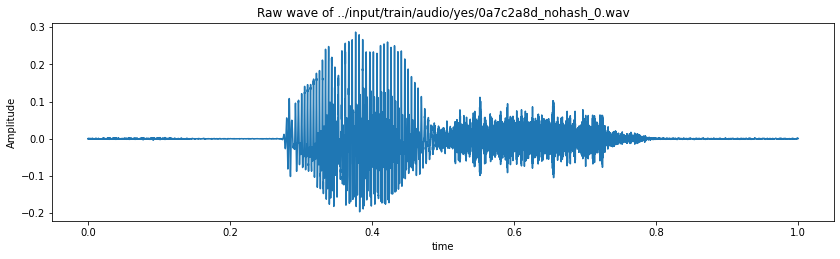

In [7]:
samples, sample_rate = librosa.load(train_audio_path+'yes/0a7c2a8d_nohash_0.wav', sr = 16000)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + '../input/train/audio/yes/0a7c2a8d_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

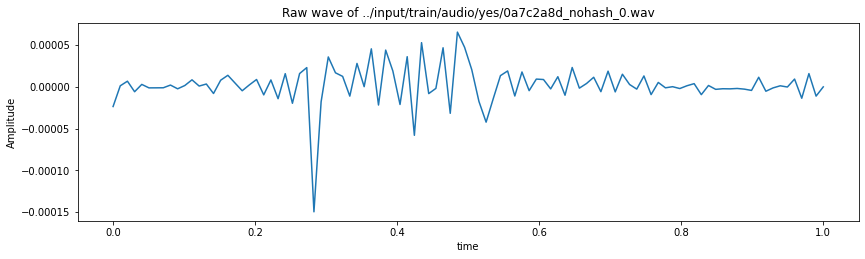

In [8]:
samples, sample_rate = librosa.load(train_audio_path+'yes/0a7c2a8d_nohash_0.wav', sr = 100)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + '../input/train/audio/yes/0a7c2a8d_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

**Sampling rate**

Let us now look at the sampling rate of the audio signals

In [9]:
sample_rate=40000
samples, sample_rate = librosa.load(train_audio_path+'yes/0a7c2a8d_nohash_0.wav', sr = sample_rate)
ipd.Audio(samples, rate=sample_rate)

In [10]:
sample_rate=16000
samples, sample_rate = librosa.load(train_audio_path+'yes/0a7c2a8d_nohash_0.wav', sr = sample_rate)
ipd.Audio(samples, rate=sample_rate)

In [11]:
sample_rate=6000
samples, sample_rate = librosa.load(train_audio_path+'yes/0a7c2a8d_nohash_0.wav', sr = sample_rate)
ipd.Audio(samples, rate=sample_rate)

In [12]:
sample_rate=3000
samples, sample_rate = librosa.load(train_audio_path+'yes/0a7c2a8d_nohash_0.wav', sr = sample_rate)
ipd.Audio(samples, rate=sample_rate)

**Resampling**

From the above, we can understand that the sampling rate of the signal is 16000 hz. Let us resample it to 8000 hz since most of the speech related frequencies are present in 8000z 

In [13]:
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples, rate=8000)

Now, let’s understand the number of recordings for each voice command:

In [14]:
labels=os.listdir(train_audio_path)

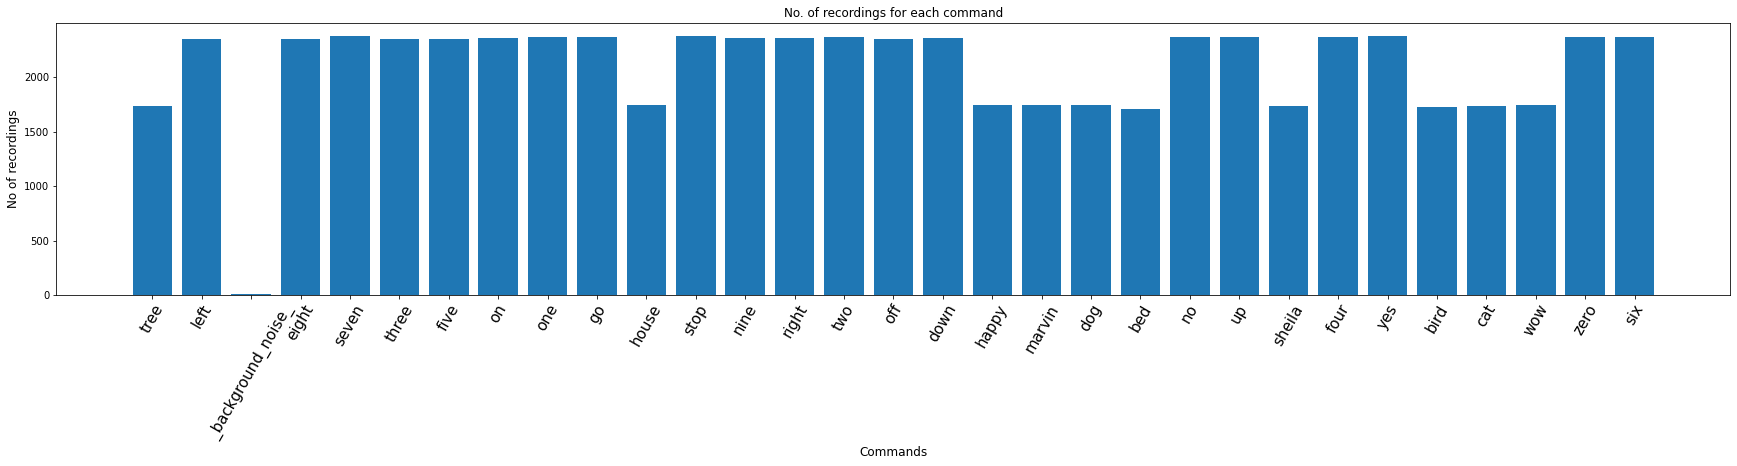

In [15]:
#find count of each label and plot bar graph
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

In [16]:
# labels=["yes", "no","stop", "go"]
labels=["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]

**Duration of recordings**

What’s next? A look at the distribution of the duration of recordings:

(array([1.5000e+01, 3.0000e+01, 4.4000e+01, 1.3800e+02, 1.3600e+02,
        1.7900e+02, 3.6600e+02, 4.3400e+02, 5.9300e+02, 2.1747e+04]),
 array([0.418 , 0.4762, 0.5344, 0.5926, 0.6508, 0.709 , 0.7672, 0.8254,
        0.8836, 0.9418, 1.    ]),
 <BarContainer object of 10 artists>)

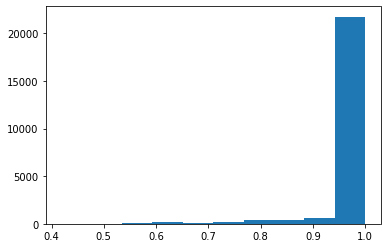

In [17]:
duration_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + '/' + label + '/' + wav)
        duration_of_recordings.append(float(len(samples)/sample_rate))
    
plt.hist(np.array(duration_of_recordings))

**Preprocessing the audio waves**

In the data exploration part earlier, we have seen that the duration of a few recordings is less than 1 second and the sampling rate is too high. So, let us read the audio waves and use the below-preprocessing steps to deal with this.

Here are the two steps we’ll follow:

* Resampling
* Removing shorter commands of less than 1 second

Let us define these preprocessing steps in the below code snippet:

In [18]:
all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

yes
no
up
down
left
right
on
off
stop
go


In [19]:
print(type(all_wave))
print(len(all_wave))

<class 'list'>
21312


In [20]:
print(len(all_wave))
print(all_wave[1].shape)
all_wave[1]

21312
(8000,)


array([-2.7709264e-05, -8.7911889e-05, -9.0863752e-05, ...,
       -1.5507458e-04, -8.9090383e-05,  5.2142364e-06], dtype=float32)

Convert the output labels to integer encoded:

In [21]:
len(set(all_label))

10

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)

In [23]:
classes

['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']

Now, convert the integer encoded labels to a one-hot vector since it is a multi-classification problem:

In [24]:
from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(labels))

In [25]:
y

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

Reshape the 2D array to 3D since the input to the conv1d must be a 3D array:

In [26]:
all_wave = np.array(all_wave).reshape(-1,8000,1)

In [27]:
all_wave.shape

(21312, 8000, 1)

**Split into train and validation set**

Next, we will train the model on 80% of the data and validate on the remaining 20%:


In [28]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)

**Model Architecture for this problem**

We will build the speech-to-text model using conv1d. Conv1d is a convolutional neural network which performs the convolution along only one dimension. 

**Model building**

Let us implement the model using Keras functional API.

### Conv1D, Conv2D and Conv3D : https://xzz201920.medium.com/conv1d-conv2d-and-conv3d-8a59182c4d6

In [29]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()

In [30]:
# ?Conv1D

In [31]:
inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(filters=8,kernel_size=13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.3)(conv)

outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8000, 1)]         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 7988, 8)           112       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2662, 8)           0         
_________________________________________________________________
dropout (Dropout)            (None, 2662, 8)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2652, 16)          1424      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 884, 16)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 884, 16)           0     

Define the loss function to be categorical cross-entropy since it is a multi-classification problem:

In [32]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Early stopping and model checkpoints are the callbacks to stop training the neural network at the right time and to save the best model after every epoch:

In [33]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

Let us train the model on a batch size of 32 and evaluate the performance on the holdout set:

In [34]:
history=model.fit(x_tr, y_tr ,epochs=100, callbacks=[es,mc], batch_size=32, validation_data=(x_val,y_val))

Epoch 1/100
533/533 [==============================] - 13s 9ms/step - loss: 2.2208 - accuracy: 0.1541 - val_loss: 1.6759 - val_accuracy: 0.4011
Epoch 2/100
533/533 [==============================] - 4s 8ms/step - loss: 1.6005 - accuracy: 0.4008 - val_loss: 1.2917 - val_accuracy: 0.5620
Epoch 3/100
533/533 [==============================] - 4s 8ms/step - loss: 1.3227 - accuracy: 0.5187 - val_loss: 1.1238 - val_accuracy: 0.6205
Epoch 4/100
533/533 [==============================] - 4s 8ms/step - loss: 1.1502 - accuracy: 0.5885 - val_loss: 1.0005 - val_accuracy: 0.6585
Epoch 5/100
533/533 [==============================] - 4s 8ms/step - loss: 1.0064 - accuracy: 0.6503 - val_loss: 0.8231 - val_accuracy: 0.7347
Epoch 6/100
533/533 [==============================] - 4s 8ms/step - loss: 0.8942 - accuracy: 0.6904 - val_loss: 0.8106 - val_accuracy: 0.7338
Epoch 7/100
533/533 [==============================] - 4s 8ms/step - loss: 0.8018 - accuracy: 0.7258 - val_loss: 0.6918 - val_accuracy: 0.778

**Diagnostic plot**

I’m going to lean on visualization again to understand the performance of the model over a period of time:

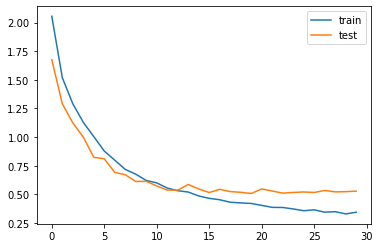

In [35]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

**Loading the best model**

In [36]:
from keras.models import load_model
model.save("SpeechRecogModel.h5")
#model=load_model('/kaggle/working/best_model.hdf5')

Define the function that predicts text for the given audio:

In [37]:
def predict(audio):
    prob=model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]

Prediction time! Make predictions on the validation data:

In [38]:
import random
index=random.randint(0,len(x_val)-1)
samples=x_val[index].ravel()
print("Audio:",classes[np.argmax(y_val[index])])
ipd.Audio(samples, rate=8000)

Audio: stop


In [39]:
print("Text:",predict(samples))

Text: stop


**The best part is yet to come! Here is a script that prompts a user to record voice commands. Record your own voice commands and test it on the model:**

In [61]:
import soundfile as sf
import numpy as np

# set up the audio processing parameters
samplerate = 16000
duration = 10 # seconds
filename = 'yes.wav'

# record the audio
print("Recording...")
recording = []
for i in range(int(samplerate * duration)):
    data = input()
    recording.append(data)
print("Finished recording.")

# save the audio
with sf.SoundFile(filename, mode='x', samplerate=samplerate, channels=1) as file:
    file.write(np.array(recording))

# load and process the audio
samples, sample_rate = librosa.load(filename, sr=samplerate)
samples = librosa.resample(samples, sample_rate, 8000)
samples = np.expand_dims(samples, axis=0)

# make a prediction
prediction = model.predict(samples)
print(prediction)


OSError: ctypes.util.find_library() did not manage to locate a library called 'portaudio'

  Using cached PyAudio-0.2.13.tar.gz (46 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  ERROR: Command errored out with exit status 1:
   command: /opt/conda/bin/python /opt/conda/lib/python3.7/site-packages/pip/_vendor/pep517/in_process/_in_process.py build_wheel /tmp/tmp93jf7wmz
       cwd: /tmp/pip-install-bjvigoep/pyaudio_b198785e0b2b4d088612bdbb7cd08026
  Complete output (18 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.linux-x86_64-cpython-37
  creating build/lib.linux-x86_64-cpython-37/pyaudio
  copying src/pyaudio/__init__.py -> build/lib.linux-x86_64-cpython-37/pyaudio
  running build_ext
  building 'pyaudio._portaudio' extension
  creating build/temp.linux-x86_64-cpython-37
  creating build/temp.linux-x86_64-cpython-37/src
  creating build/temp.linux-x86_64-cpython-37/src/pyaudio
  gcc -pthread -B /opt/conda/compiler_compat -Wl,--sysroo

OSError: ctypes.util.find_library() did not manage to locate a library called 'portaudio'

ModuleNotFoundError: No module named 'pyaudio'

Let us now read the saved voice command and convert it to text:

In [42]:
# #reading the voice commands
# samples, sample_rate = librosa.load(filepath + '/' + 'stop.wav', sr = 16000)
# samples = librosa.resample(samples, sample_rate, 8000)
# ipd.Audio(samples,rate=8000)              

In [43]:
# #converting voice commands to text
# predict(samples)

In [70]:
import soundfile as sf

Recording...


KeyboardInterrupt: Interrupted by user

**Congratulations! You have just built your very own speech-to-text model!**